In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
dbpath= 'database.sqlite'
conn = sqlite3.connect(dbpath)
df = pd.read_sql("SELECT * FROM Player_Attributes", conn)

In [3]:
gk_df = df[["gk_reflexes", "gk_kicking","gk_handling"]].dropna()
X = gk_df[["gk_reflexes","gk_kicking"]].values

In [4]:
def kmean_viz(X, cluster):
    km = KMeans(n_clusters = cluster,
            init ="k-means++",
            n_init = 10,
            max_iter = 300,
            random_state = 0)

    y_km = km.fit_predict(X)

    plt.scatter(X[:,0], 
                X[:,1], 
                c = y_km, 
                s = 50, 
                cmap = "viridis")

    centers = km.cluster_centers_
    
    plt.scatter(centers[:,0], 
                centers[:,1], 
                c = "black", 
                s = 200, 
                alpha = 0.5)
    plt.show()

K-Mean with K = 5

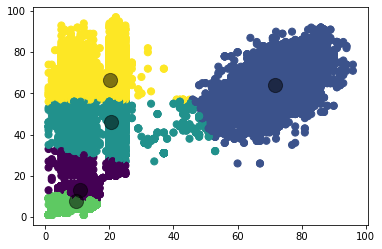

In [5]:
kmean_viz(X, 5)

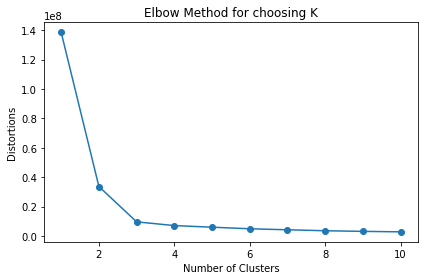

In [6]:
distortions = []
for i in range(1, 11): 
    km = KMeans(n_clusters = i,
                init ="k-means++",
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), 
         distortions, 
         marker="o")

plt.title("Elbow Method for choosing K")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")
plt.tight_layout()
plt.show()

K-Mean with optimal K = 3

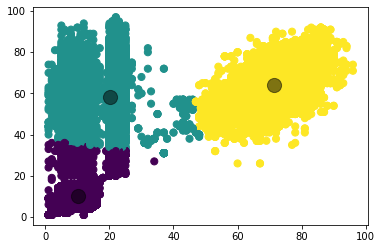

In [7]:
kmean_viz(X, 3)